In [8]:
import pandas as pd
df1 = pd.read_csv('./data/student-mat.csv')
df2 = pd.read_csv('./data/student-por.csv',sep=";")
df = pd.concat([df1, df2], ignore_index=True)
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
1,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
2,GP,M,19,U,GT3,T,3,2,services,at_home,...,4,5,4,1,1,4,0,5,0,0
3,GP,M,16,U,LE3,T,4,3,teacher,other,...,5,4,5,1,1,3,0,6,0,0
4,GP,F,18,R,GT3,T,2,1,other,other,...,4,3,5,1,2,3,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
import pandas as pd

# Giả sử em đã có DataFrame tên là df
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

# Ngưỡng dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# In ra các giá trị ngoại lai
outliers = df[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)]
print("Giá trị ngoại lai trong 'absences':")
print(outliers['absences'].sort_values())


Giá trị ngoại lai trong 'absences':
435    16
354    16
625    16
606    16
649    16
658    16
706    16
221    16
601    16
82     16
70     16
556    16
240    16
800    16
498    16
34     16
204    16
173    17
277    18
648    18
721    18
69     18
66     18
54     18
792    18
195    18
175    19
91     20
257    20
288    20
314    20
612    21
808    21
382    21
720    22
115    22
223    22
33     22
550    22
283    23
386    24
545    24
151    25
651    26
53     26
136    28
607    30
89     30
592    32
97     38
236    40
218    54
103    56
138    75
Name: absences, dtype: int64


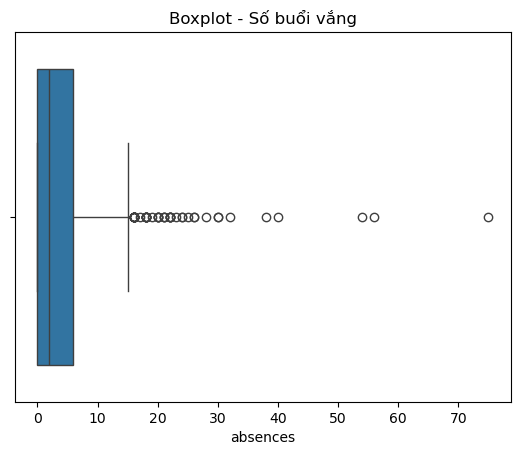

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['absences'])
plt.title("Boxplot - Số buổi vắng")
plt.xlabel("absences")
plt.show()


In [13]:
# Lọc ra các cột số
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary[col] = {
        'Số lượng ngoại lai': outliers.shape[0],
        'Tỉ lệ % ngoại lai': round(outliers.shape[0] / df.shape[0] * 100, 2),
        'Giá trị lớn nhất': df[col].max(),
        'Giá trị nhỏ nhất': df[col].min()
    }

# In kết quả
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Số lượng ngoại lai', ascending=False)
print(outlier_df)


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
            Số lượng ngoại lai  Tỉ lệ % ngoại lai  Giá trị lớn nhất  \
failures                 183.0              17.53               3.0   
famrel                    77.0               7.38               5.0   
freetime                  64.0               6.13               5.0   
studytime                 62.0               5.94               4.0   
absences                  54.0               5.17              75.0   
G3                        54.0               5.17              20.0   
Dalc                      52.0               4.98               5.0   
traveltime                24.0               2.30               4.0   
G2                        20.0               1.92              19.0   
age                        2.0               0.19              22.0   
G1                        